# Initial Imports

In [ ]:
import IPython
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Crop_recommendation.csv to Crop_recommendation.csv


In [ ]:
data= pd.read_csv("Crop_recommendation.csv")

# Data Analysis

In [ ]:
data.shape

(2200, 8)

In [ ]:
data.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
data.tail(5)

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [ ]:
data.columns


Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [ ]:
data.duplicated().sum() #checking for duplicate values in a dataframe and returns number of duplicates
#data.drop_duplicates() #drops the duplicates if there is any

0

In [ ]:
data.isnull().sum() #checkes whether there is any null value or not and returns 0 if there is nothing as such

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
data.info() #provides a concise summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
data.describe() # returns description like statistical info of the data

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
data.nunique() # returns the number of unique values for each column in the DataFrame

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [ ]:
data['label'].unique() #gives the list of crops present in the csv file UNDER the column label

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [ ]:
crop_summary=pd.pivot_table(data,index="label",aggfunc="mean") #using one more pivot table to analyse the mean values

In [ ]:
crop_summary

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892
coffee,29.94,101.20,28.74,58.869846,6.790308,158.066295,25.540477
cotton,19.56,117.77,46.24,79.843474,6.912675,80.398043,23.988958
grapes,200.11,23.18,132.53,81.875228,6.025937,69.611829,23.849575
jute,39.99,78.40,46.86,79.639864,6.732778,174.792798,24.958376


# Checking and Treating Outliners

In [ ]:
import plotly.express as px

Detecting and removal of outliner for Nitrogen

In [ ]:
fig=px.box(data,y="N",points="all")
fig.show()

In [ ]:
df = data
df.columns=data.columns
df.head()
''' Detection '''
# IQR
Q1 = np.percentile(df ['N'], 25,interpolation = 'midpoint')
Q3 = np.percentile(df ['N'], 75,interpolation = 'midpoint')
IQR = Q3-Q1
print("Old Shape: ", df.shape)
# Upper bound
upper = np.where(df['N'] >= (Q3+1.5*IQR))
#Lower bound
lower = np.where (df['N'] <= (Q1-1.5*IQR))
''' Removing Outlines '''
df.drop (upper [0], inplace = True)
df.drop (lower [0], inplace = True)
print("New Shape: ", df.shape)

Old Shape:  (2200, 8)
New Shape:  (2200, 8)


In [ ]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

<function matplotlib.pyplot.show(close=None, block=None)>

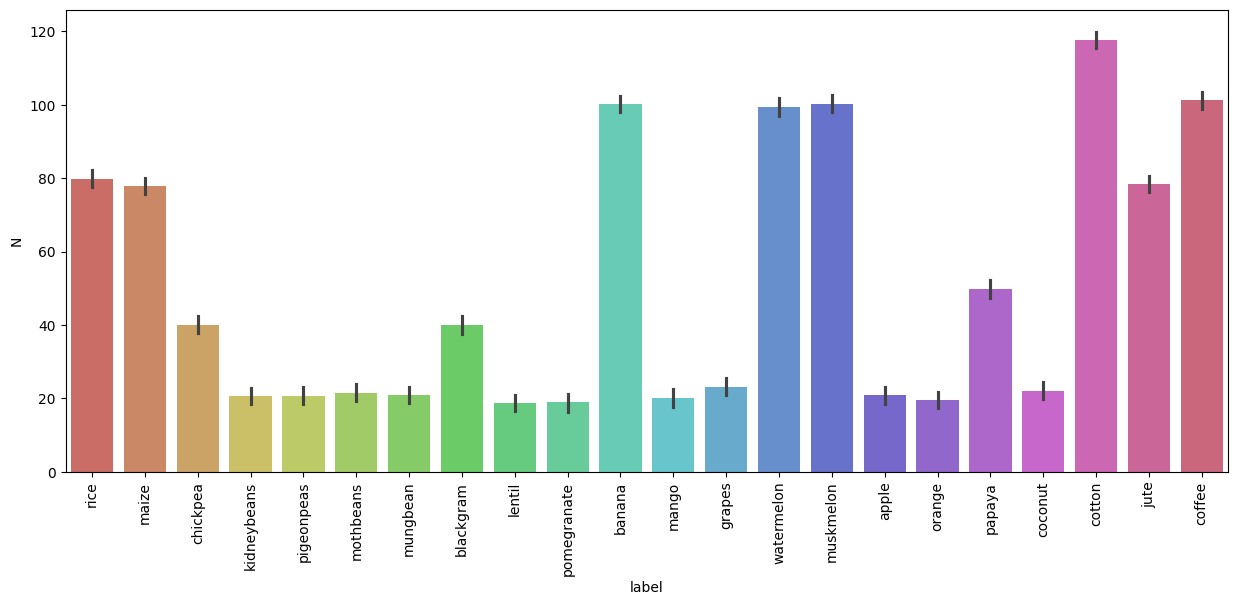

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(y='N',x='label',data=data,palette='hls')
plt.xticks(rotation=90)
plt.show

Detecting and removal of outliners for Phosphorous

In [ ]:
fig=px.box(data,y="P",points="all")
fig.show()

In [ ]:
df = data
df.columns=data.columns
df.head()
''' Detection '''
# IQR
Q1 = np.percentile(df ['P'], 25,interpolation = 'midpoint')
Q3 = np.percentile(df ['P'], 75,interpolation = 'midpoint')
IQR = Q3-Q1
print("Old Shape: ", df.shape)
# Upper bound
upper = np.where(df['P'] >= (Q3+1.5*IQR))
#Lower bound
lower = np.where (df['P'] <= (Q1-1.5*IQR))
''' Removing Outlines '''
df.drop (upper [0], inplace = True)
df.drop (lower [0], inplace = True)
print("New Shape: ", df.shape)

Old Shape:  (2200, 8)
New Shape:  (2056, 8)


<function matplotlib.pyplot.show(close=None, block=None)>

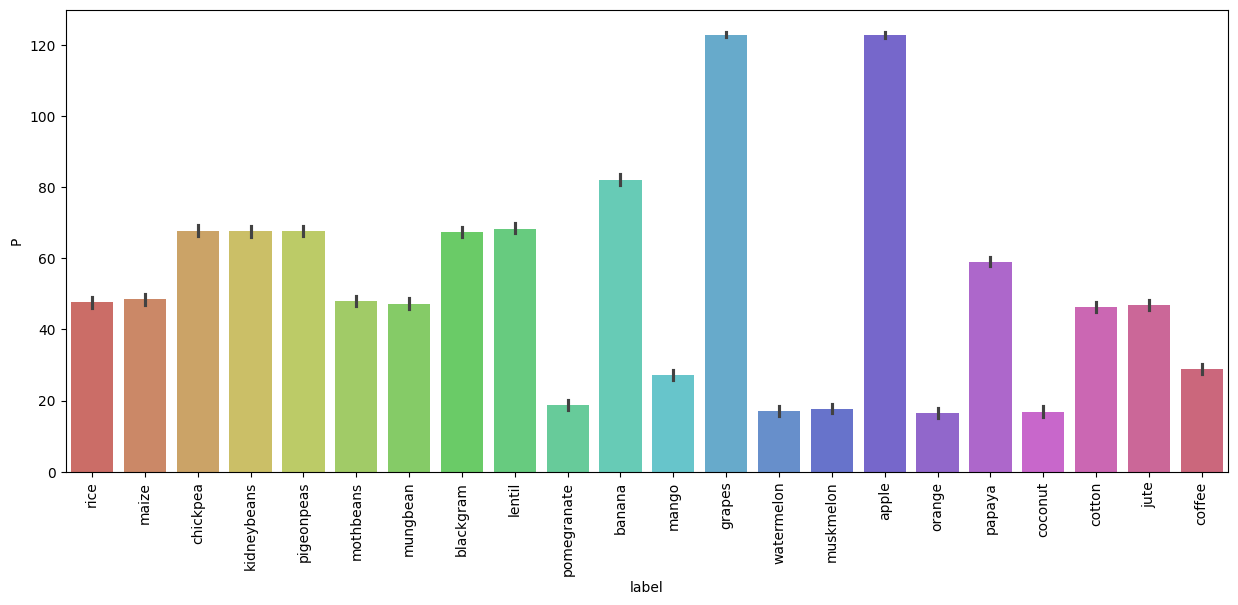

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(y='P',x='label',data=data,palette='hls')
plt.xticks(rotation=90)
plt.show

Detecting and removal of outliners for K

In [ ]:
fig=px.box(data,y="K",points="all")
fig.show()

In [ ]:
df = data
df.columns=data.columns
df.head()

Q1 = np.percentile(df['K'], 25, interpolation='midpoint')
Q3 = np.percentile(df['K'], 75, interpolation='midpoint')
IQR = Q3 - Q1
print("Old Shape:", df.shape)

# Upper bound
upper = np.where(df['K'] >= (Q3 + 1.5 * IQR))[0]  # Extract indices from tuple

# Lower bound
lower = np.where(df['K'] <= (Q1 - 1.5 * IQR))[0]  # Extract indices from tuple

# Removing Outliers
df.drop(upper, inplace=True,errors='ignore')
df.drop(lower, inplace=True,errors='ignore')
print("New Shape:", df.shape)

Old Shape: (2056, 8)
New Shape: (2007, 8)


<function matplotlib.pyplot.show(close=None, block=None)>

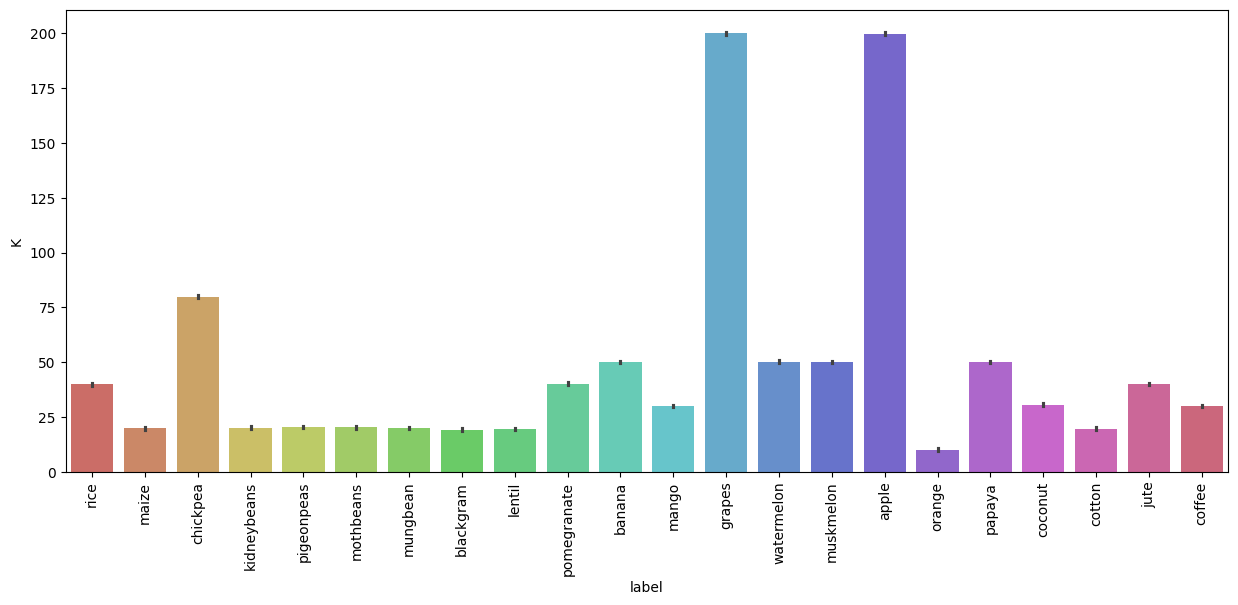

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(y='K',x='label',data=data,palette='hls')
plt.xticks(rotation=90)
plt.show

Detecting and removal of outliners for Temperature

In [ ]:
fig=px.box(data,y="temperature",points="all")
fig.show()

In [ ]:
df = data
df.columns=data.columns
df.head()

Q1 = np.percentile(df['temperature'], 25, interpolation='midpoint')
Q3 = np.percentile(df['temperature'], 75, interpolation='midpoint')
IQR = Q3 - Q1
print("Old Shape:", df.shape)

# Upper bound
upper = np.where(df['temperature'] >= (Q3 + 1.5 * IQR))[0]  # Extract indices from tuple

# Lower bound
lower = np.where(df['temperature'] <= (Q1 - 1.5 * IQR))[0]  # Extract indices from tuple

# Removing Outliers
df.drop(upper, inplace=True,errors='ignore')
df.drop(lower, inplace=True,errors='ignore')
print("New Shape:", df.shape)

Old Shape: (2200, 8)
New Shape: (2114, 8)


<function matplotlib.pyplot.show(close=None, block=None)>

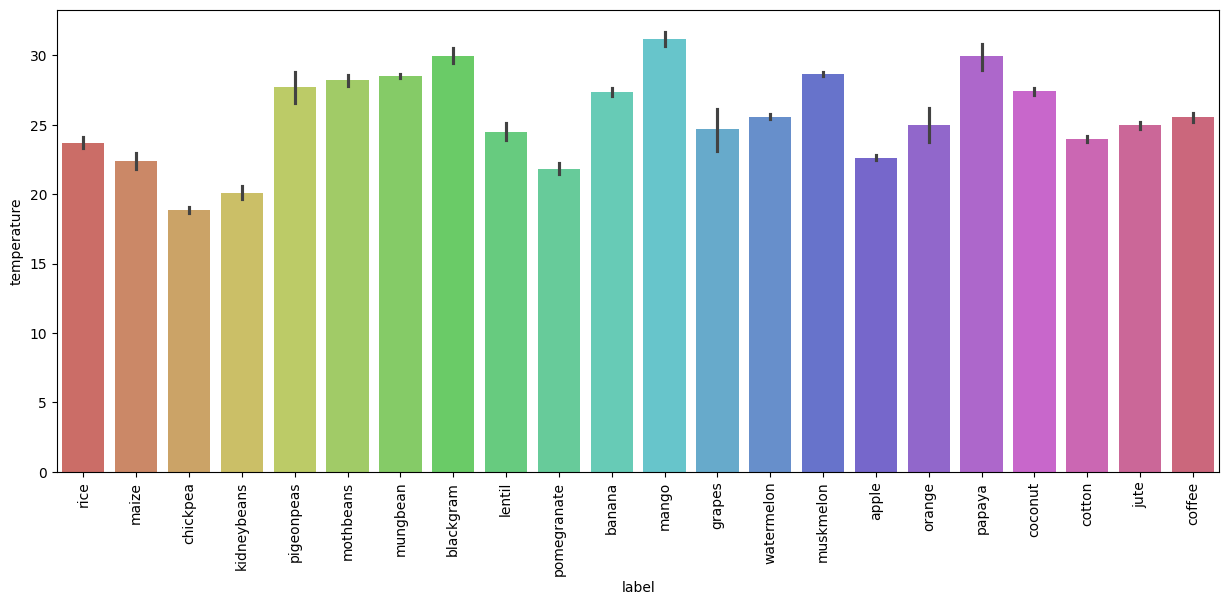

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(y='temperature',x='label',data=data,palette='hls')
plt.xticks(rotation=90)
plt.show

HUMIDITY OUTLINER

In [ ]:
fig=px.box(data,y="humidity",points="all")
fig.show()

In [ ]:
df = data
df.columns=data.columns
df.head()

Q1 = np.percentile(df['humidity'], 25, interpolation='midpoint')
Q3 = np.percentile(df['humidity'], 75, interpolation='midpoint')
IQR = Q3 - Q1
print("Old Shape:", df.shape)

# Upper bound
upper = np.where(df['humidity'] >= (Q3 + 1.5 * IQR))[0]  # Extract indices from tuple

# Lower bound
lower = np.where(df['humidity'] <= (Q1 - 1.5 * IQR))[0]  # Extract indices from tuple

# Removing Outliers
df.drop(upper, inplace=True,errors='ignore')
df.drop(lower, inplace=True,errors='ignore')
print("New Shape:", df.shape)

Old Shape: (2114, 8)
New Shape: (2108, 8)


<function matplotlib.pyplot.show(close=None, block=None)>

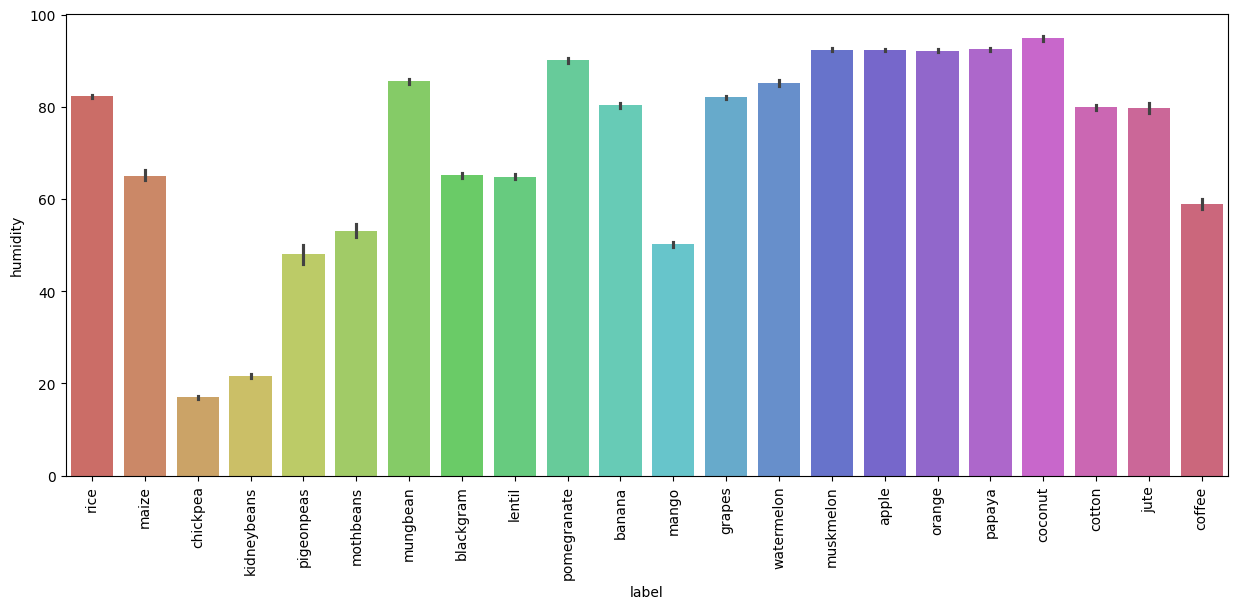

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(y='humidity',x='label',data=data,palette='hls')
plt.xticks(rotation=90)
plt.show

Ph OUTLINER

In [ ]:
fig=px.box(data,y="ph",points="all")
fig.show()

In [ ]:
df = data
df.columns=data.columns
df.head()

Q1 = np.percentile(df['ph'], 25, interpolation='midpoint')
Q3 = np.percentile(df['ph'], 75, interpolation='midpoint')
IQR = Q3 - Q1
print("Old Shape:", df.shape)

# Upper bound
upper = np.where(df['ph'] >= (Q3 + 1.5 * IQR))[0]  # Extract indices from tuple

# Lower bound
lower = np.where(df['ph'] <= (Q1 - 1.5 * IQR))[0]  # Extract indices from tuple

# Removing Outliers
df.drop(upper, inplace=True,errors='ignore')
df.drop(lower, inplace=True,errors='ignore')
print("New Shape:", df.shape)

Old Shape: (2108, 8)
New Shape: (2057, 8)


<function matplotlib.pyplot.show(close=None, block=None)>

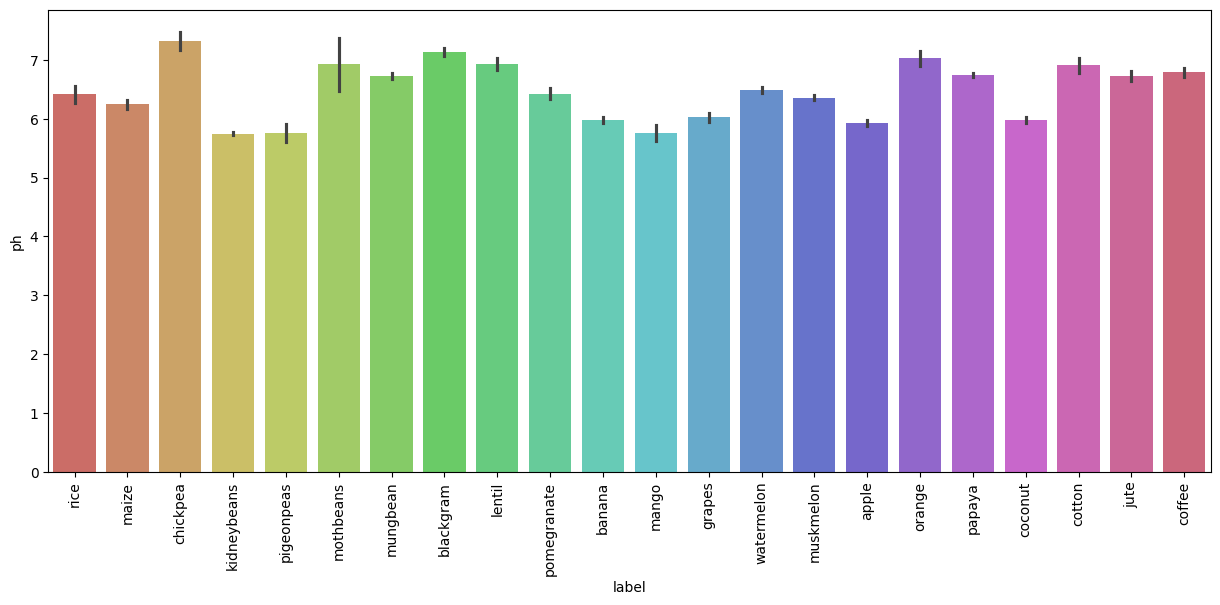

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(y='ph',x='label',data=data,palette='hls')
plt.xticks(rotation=90)
plt.show

Rainfall Outliner

In [ ]:
fig=px.box(data,y="rainfall",points="all")
fig.show()

In [ ]:
df = data
df.columns=data.columns
df.head()

Q1 = np.percentile(df['rainfall'], 25, interpolation='midpoint')
Q3 = np.percentile(df['rainfall'], 75, interpolation='midpoint')
IQR = Q3 - Q1
print("Old Shape:", df.shape)

# Upper bound
upper = np.where(df['rainfall'] >= (Q3 + 1.5 * IQR))[0]  # Extract indices from tuple

# Lower bound
lower = np.where(df['rainfall'] <= (Q1 - 1.5 * IQR))[0]  # Extract indices from tuple

# Removing Outliers
df.drop(upper, inplace=True,errors='ignore')
df.drop(lower, inplace=True,errors='ignore')
print("New Shape:", df.shape)

Old Shape: (2025, 8)
New Shape: (1947, 8)


<function matplotlib.pyplot.show(close=None, block=None)>

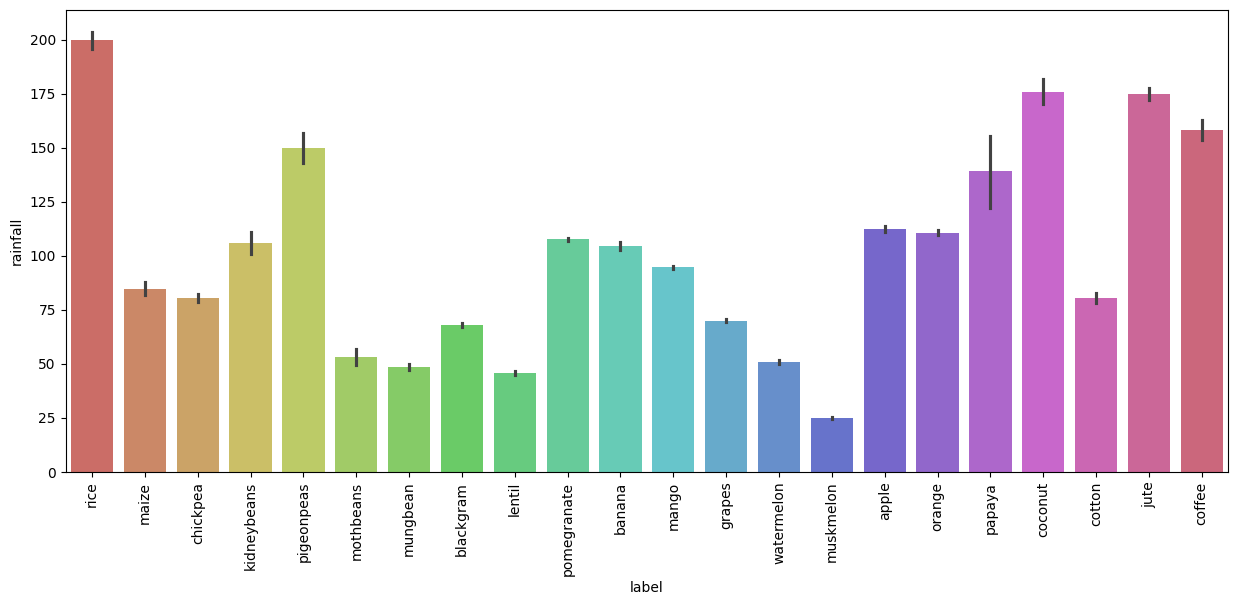

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(y='rainfall',x='label',data=data,palette='hls')
plt.xticks(rotation=90)
plt.show

In [ ]:
data=df

In [ ]:
crop_summary_new=data.copy()


In [ ]:
crop_summary_new

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice
13,93,56,36,24.014976,82.056872,6.984354,185.277339,rice
14,94,50,37,25.665852,80.663850,6.948020,209.586971,rice
17,91,35,39,23.793920,80.418180,6.970860,206.261186,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
crop_summary_new.shape

(1947, 8)

Bar Graph for crop_summary table

In [ ]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [ ]:
fig1=px.bar(crop_summary_new,x='label',y='N')
fig1.show()

In [ ]:
fig1=px.bar(crop_summary_new,x='label',y='P')
fig1.show()

In [ ]:
fig1=px.bar(crop_summary_new,x='label',y='K')
fig1.show()

In [ ]:
fig1=px.bar(crop_summary_new,x='label',y='K')
fig1.show()

In [ ]:
fig1=px.bar(crop_summary_new,x='label',y='humidity')
fig1.show()

In [ ]:
fig1=px.bar(crop_summary_new,x='label',y='temperature')
fig1.show()

In [ ]:
fig1=px.bar(crop_summary_new,x='label',y='ph')
fig1.show()

In [ ]:
fig1=px.bar(crop_summary_new,x='label',y='rainfall')
fig1.show()

In [ ]:
import random
from IPython.core.display import update_display

In [ ]:
data.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.230904,-0.133278,0.019858,0.183822,0.119844,-0.028609
P,-0.230904,1.000000,0.701704,-0.165407,-0.136106,-0.129530,-0.044769
K,-0.133278,0.701704,1.000000,-0.177814,0.208268,-0.176384,-0.029017
temperature,0.019858,-0.165407,-0.177814,1.000000,0.229914,-0.018616,-0.065263
humidity,0.183822,-0.136106,0.208268,0.229914,1.000000,0.024076,0.023610
ph,0.119844,-0.129530,-0.176384,-0.018616,0.024076,1.000000,-0.143679
rainfall,-0.028609,-0.044769,-0.029017,-0.065263,0.023610,-0.143679,1.000000


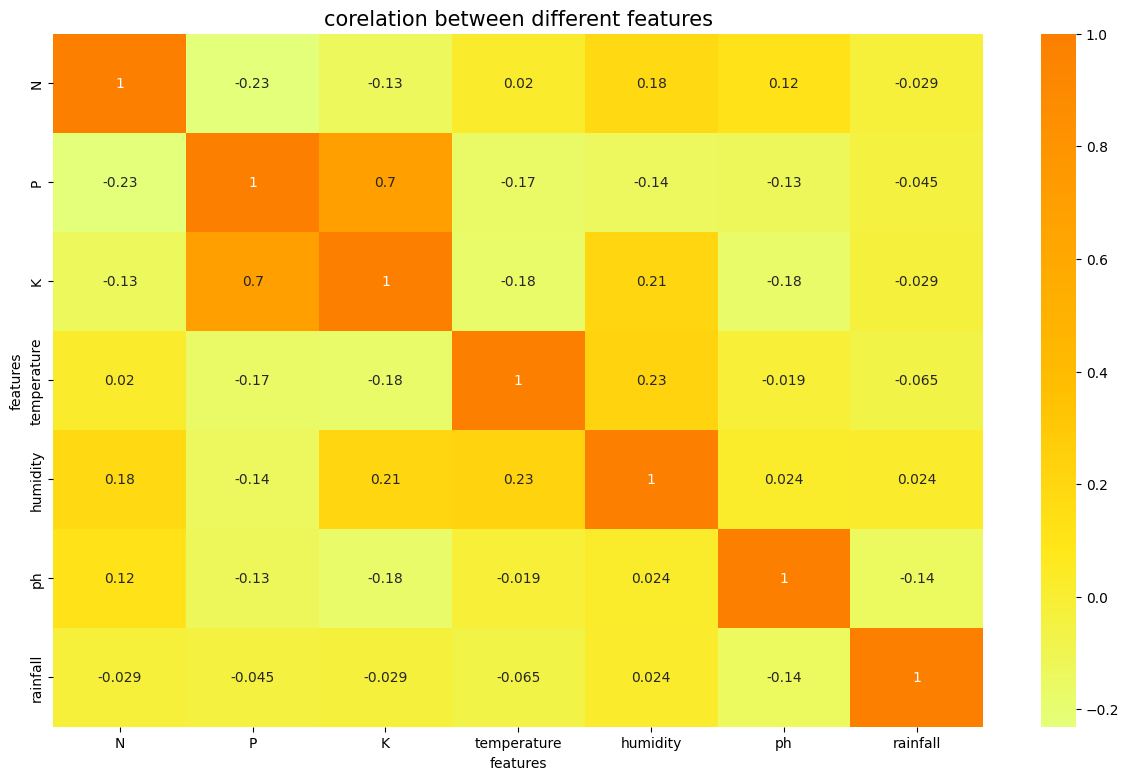

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(15,9))
sns.heatmap(data.corr(),annot=True,cmap='Wistia')
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('corelation between different features',fontsize=15,c='black')
plt.show()

# Training Model

In [ ]:
X=data.drop('label',axis=1)
y=data['label']

In [ ]:
X.shape

(1947, 7)

data splitting

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y,shuffle=True,random_state=0)

In [ ]:
print(len(X_train),len(y_test))

1362 585


Model building

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

# LIGHTGBM

In [ ]:
model = lgb.LGBMClassifier()
model.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000363 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 1362, number of used features: 7
[LightGBM] [Info] Start training from score -3.027055
[LightGBM] [Info] Start training from score -2.982603
[LightGBM] [Info] Start training from score -2.968214
[LightGBM] [Info] Start training from score -3.246418
[LightGBM] [Info] Start training from score -2.968214
[LightGBM] [Info] Start training from score -2.968214
[LightGBM] [Info] Start training from score -2.968214
[LightGBM] [Info] Start training from score -3.388068
[LightGBM] [Info] Start training from score -2.968214
[LightGBM] [Info] Start training from score -2.968214
[LightGBM] [Info] Start training from score -2.968214
[LightGBM] [Info] Start training from score -2.968214
[LightGBM] [Info] Start training from score -2.997202
[LightGBM] 

LGBMClassifier()

In [ ]:
y_pred1=model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred1, y_test)
print('LightGBM Model accuracy score: {0:04f}'.format(accuracy_score(y_test,y_pred1)))


LightGBM Model accuracy score: 0.991453


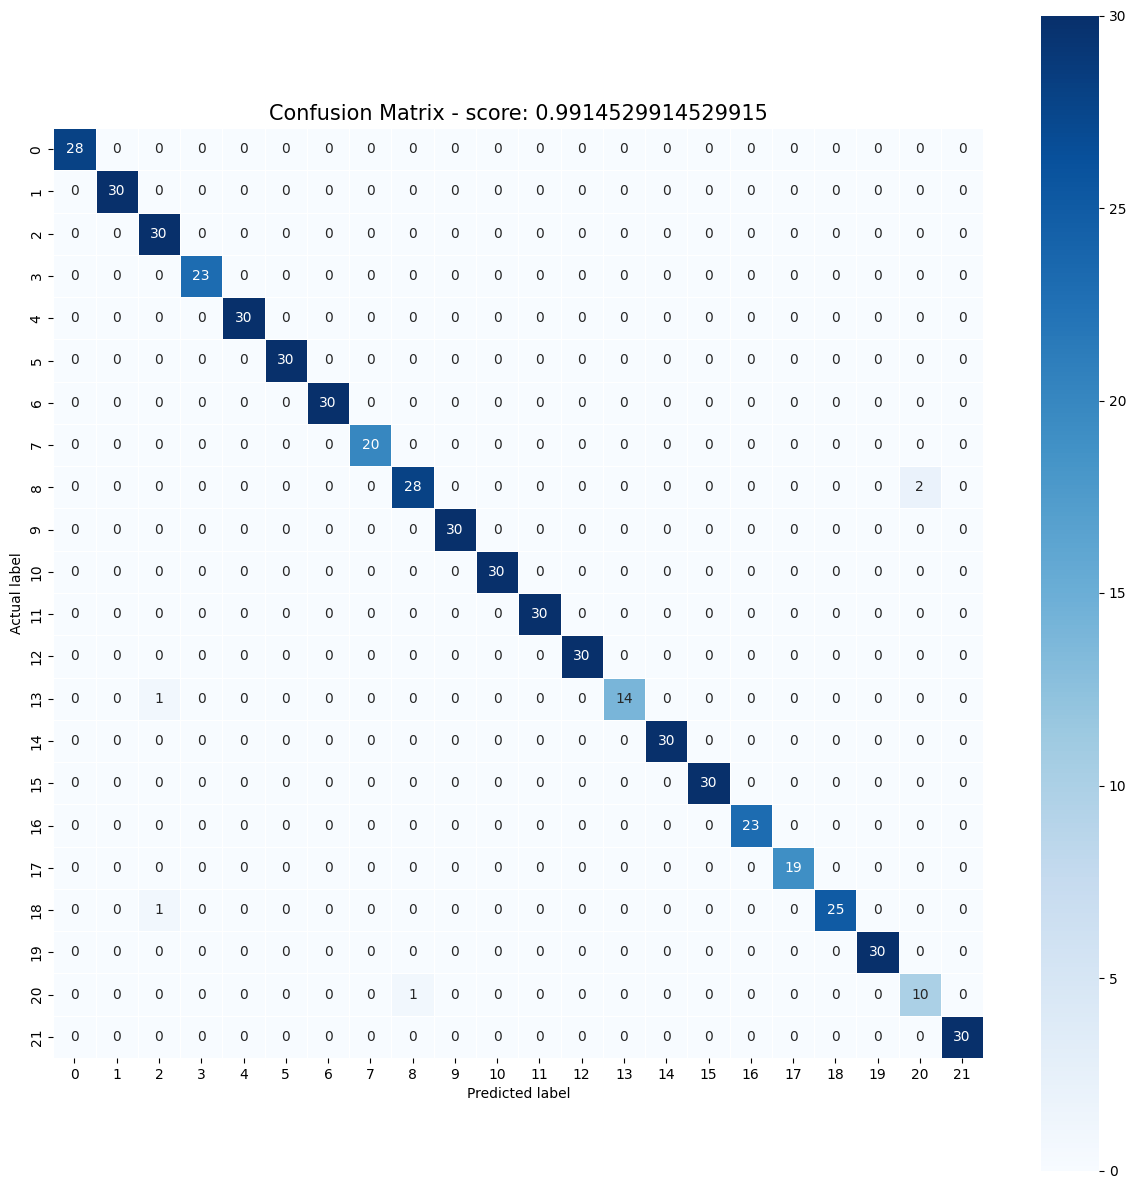

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred1)
plt.figure (figsize=(15,15))
sns.heatmap (cm,annot=True, fmt=".0f", linewidths=.5, square= True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title= 'Confusion Matrix - score: ' +str(accuracy_score (y_test,y_pred1))
plt.title(all_sample_title, size = 15);
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        30
   blackgram       0.94      1.00      0.97        30
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        30
      coffee       1.00      1.00      1.00        30
      cotton       1.00      1.00      1.00        30
      grapes       1.00      1.00      1.00        20
        jute       0.97      0.93      0.95        30
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      1.00      1.00        30
       maize       1.00      1.00      1.00        30
       mango       1.00      1.00      1.00        30
   mothbeans       1.00      0.93      0.97        15
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [ ]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,X_test,y_test,cv=5)
scores.mean()

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

0.9606837606837606

# DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier
Classifier=DecisionTreeClassifier (criterion='entropy', random_state=0)


In [ ]:
Classifier.fit (X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred2=Classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score (y_test,y_pred2)
print('decision tree model accuracy score: {0:0.4f}'.format(accuracy_score (y_test,y_pred2)))

decision tree model accuracy score: 0.9812


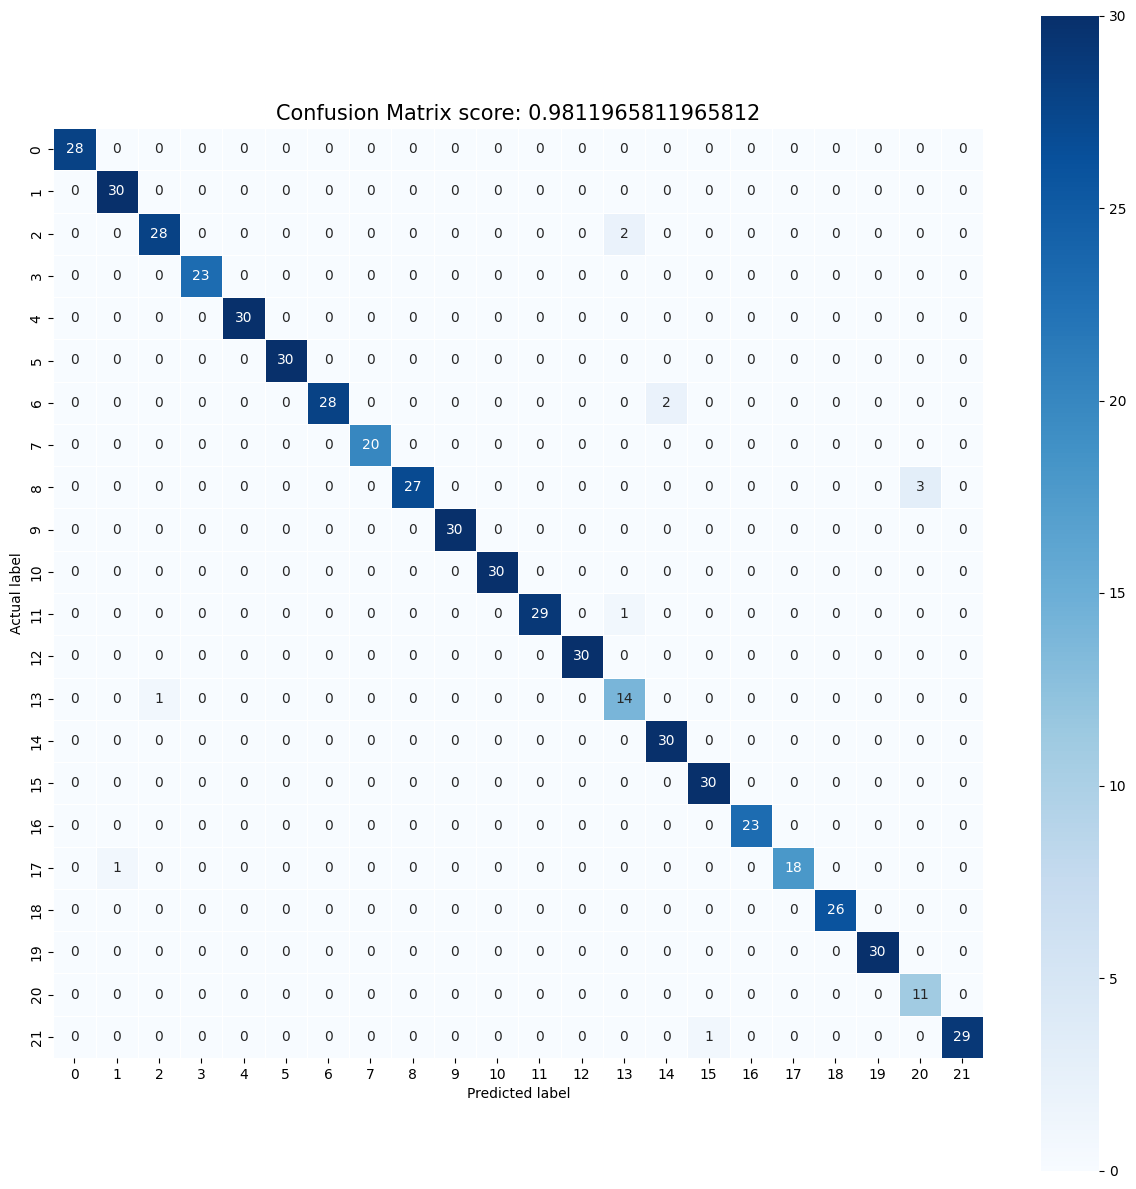

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred2)
plt. figure (figsize=(15, 15))
sns.heatmap (cm, annot=True, fmt=".0f", linewidths=.5, square= True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel ('Predicted label');
all_sample_title= 'Confusion Matrix score: ' +str(accuracy_score(y_test,y_pred2))
plt.title(all_sample_title, size = 15);
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       0.97      1.00      0.98        30
   blackgram       0.97      0.93      0.95        30
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        30
      coffee       1.00      1.00      1.00        30
      cotton       1.00      0.93      0.97        30
      grapes       1.00      1.00      1.00        20
        jute       1.00      0.90      0.95        30
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      1.00      1.00        30
       maize       1.00      0.97      0.98        30
       mango       1.00      1.00      1.00        30
   mothbeans       0.82      0.93      0.87        15
    mungbean       0.94      1.00      0.97        30
   muskmelon       0.97      1.00      0.98        30
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [ ]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(Classifier,X_test,y_test,cv=5)
scores.mean()

0.9435897435897436

# RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf=RandomForestClassifier(n_estimators=10,criterion="entropy")
classifier_rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
y_pred3=classifier_rf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score (y_test,y_pred3)
print('random forest model accuracy score: {0:0.4f}'.format(accuracy_score (y_test,y_pred3)))

random forest model accuracy score: 0.9863


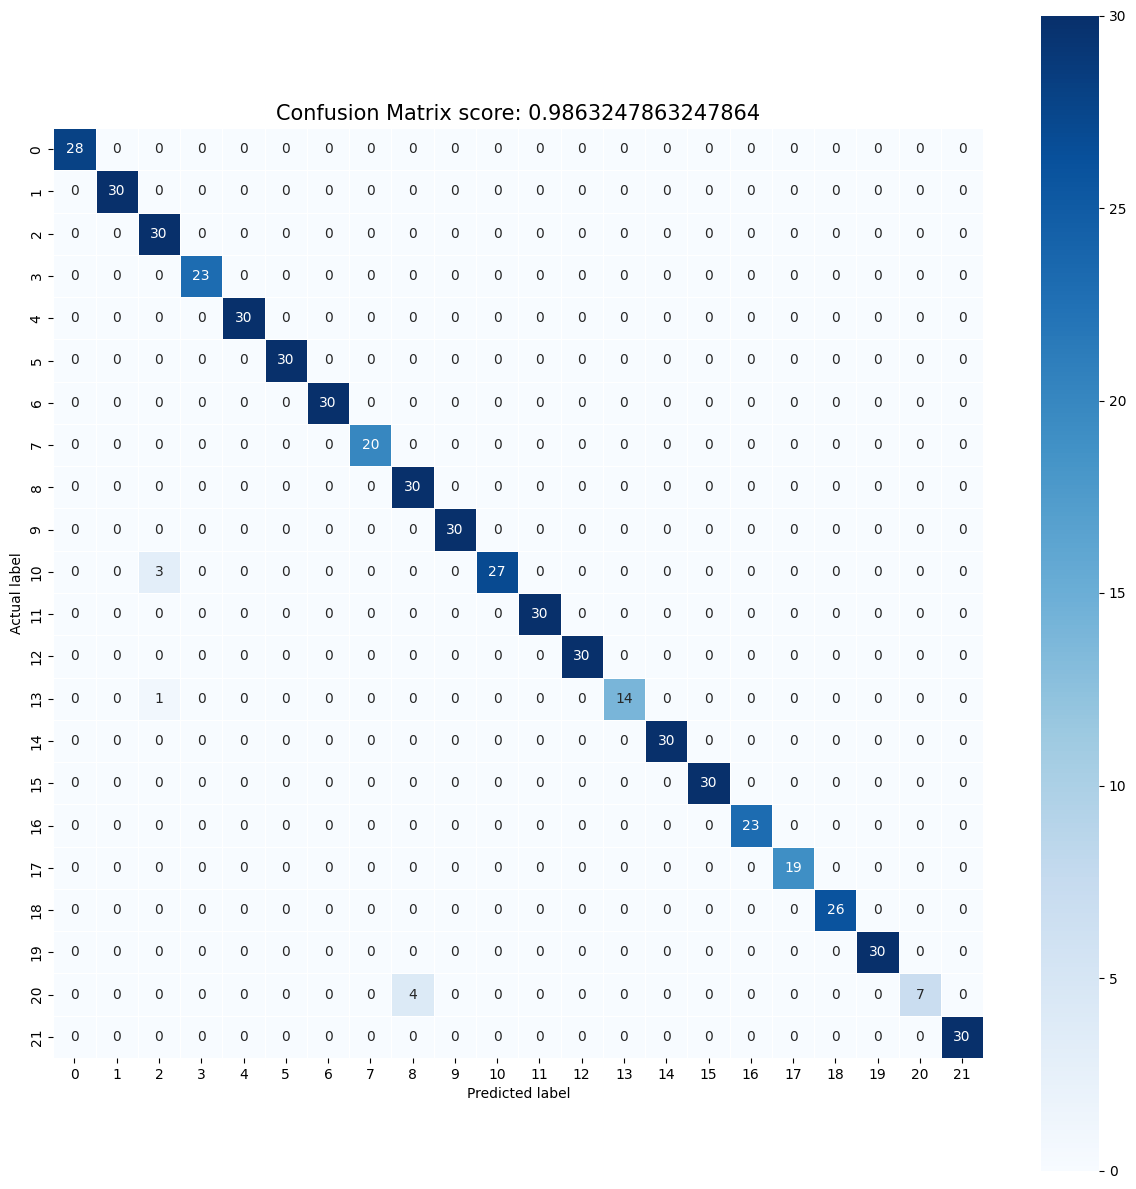

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred3)
plt. figure (figsize=(15, 15))
sns.heatmap (cm, annot=True, fmt=".0f", linewidths=.5, square= True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel ('Predicted label');
all_sample_title= 'Confusion Matrix score: ' +str(accuracy_score(y_test,y_pred3))
plt.title(all_sample_title, size = 15);
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        30
   blackgram       0.88      1.00      0.94        30
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        30
      coffee       1.00      1.00      1.00        30
      cotton       1.00      1.00      1.00        30
      grapes       1.00      1.00      1.00        20
        jute       0.88      1.00      0.94        30
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      0.90      0.95        30
       maize       1.00      1.00      1.00        30
       mango       1.00      1.00      1.00        30
   mothbeans       1.00      0.93      0.97        15
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [ ]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(classifier_rf,X_test,y_test,cv=5)
scores.mean()

0.9794871794871796

# Analysis & Result

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dfle=df
dfle=le.fit_transform(y_test)
y_t=dfle
y_t
y_p=le.fit_transform(y_pred1)
y_p

array([ 2, 12, 16,  7, 16, 15,  5, 14, 16, 12,  0,  5, 11, 19,  5,  5, 18,
       14, 12, 19,  5,  6, 14,  7, 18,  3, 13, 15,  6, 14, 21, 19,  0,  0,
        1,  4,  2,  4, 20,  8, 12, 16,  7,  4,  8, 12, 13, 17, 11, 19,  2,
       16,  6, 10, 17, 17,  0, 19, 20, 13,  1, 10, 14, 17, 17, 15, 13,  4,
        7,  5, 18, 15,  0,  8, 20, 18,  5, 14,  7, 16, 14,  9,  0, 11, 12,
        0, 17,  6, 19, 18, 10,  9,  8, 16,  6, 11,  5,  5, 21, 21,  1, 10,
       21, 12, 14,  5, 13,  9,  8, 12,  1, 14, 11, 16, 13,  6,  7, 17,  1,
       21,  0,  2, 16,  6, 17,  9,  6,  8,  2,  6, 14, 19, 10,  9,  3, 21,
        3,  2,  2,  1, 21, 16, 15,  7,  3, 15,  3,  1,  8, 16,  0, 15, 13,
       18, 12, 18,  6,  5,  3,  3,  6, 16,  2, 10,  2, 15,  0,  1, 19,  1,
        4,  6,  2, 11, 10, 12, 14,  9,  2, 20,  9,  9, 12, 15,  4,  1,  2,
       13,  9,  2, 13,  7, 14,  7, 19,  1, 12,  3, 19,  7,  5, 21, 10, 10,
        1,  7,  6, 14, 19,  8,  4, 19, 18,  1, 18, 15, 17, 19, 11,  8,  6,
       16, 15,  4, 11,  8

In [ ]:
from sklearn.metrics import r2_score
res=r2_score(y_true=y_t,y_pred=y_p)
res

0.9648441835143055

In [ ]:
dfle2=df
dfle2=le.fit_transform(y_test)
y_t=dfle2
y_t
y_p=le.fit_transform(y_pred2)
y_p
res=r2_score(y_true=y_t,y_pred=y_p)
res

0.9470272678664257

In [ ]:
dfle3=df
dfle3=le.fit_transform(y_test)
y_t=dfle3
y_t
y_p=le.fit_transform(y_pred3)
y_p
res=r2_score(y_true=y_t,y_pred=y_p)
res

0.9613677121683777

In [ ]:
from sklearn.metrics import mean_squared_error
dfle=df
dfle=le.fit_transform(y_test)
y_t=dfle
y_t
y_p=le.fit_transform(y_pred1)
y_p
n=len(y_t)
sum1=sum(((y_t-y_p)**2)/n)
mse=sum1
#mse=mean_squared_error(y_t,y_p)
print("MSE of LIGHTGBM is:",mse)

MSE of LIGHTGBM is: 1.3829059829059829


In [ ]:
dfle=df
dfle=le.fit_transform(y_test)
y_t=dfle
y_t
y_p=le.fit_transform(y_pred2)
y_p
mse=mean_squared_error(y_t,y_p)
print("MSE of DTC is:",mse)

MSE of DTC is: 2.083760683760684


In [ ]:
dfle=df
dfle=le.fit_transform(y_test)
y_t=dfle
y_t
y_p=le.fit_transform(y_pred3)
y_p
mse=mean_squared_error(y_t,y_p)
print("MSE of RFC is:",mse)

MSE of RFC is: 1.5196581196581196


In [ ]:
print(len(X_train),len(X_test),len(y_train),len(y_test))

1362 585 1362 585


In [ ]:
print(y_test[525:531])

1480      muskmelon
604        mungbean
1482      muskmelon
890          lentil
1763         papaya
378     kidneybeans
Name: label, dtype: object


Prediction using models try 1

In [ ]:
res=model.predict([[34,45,23,29.21780035, 87.93724219,6.54450214,43.1386631]])
sol=res[0]

In [ ]:
res2=Classifier.predict([[34,45,23,29.21780035, 87.93724219,6.54450214,43.1386631]])
sol2=res2[0]

In [ ]:
res3=classifier_rf.predict([[34,45,23,29.21780035, 87.93724219,6.54450214,43.1386631]])
sol3=res3[0]

In [ ]:
print("Random Forest:",sol3)
print("Decision Tree:",sol2)
print("lightGBM:",sol)

Random Forest: mungbean
Decision Tree: mungbean
lightGBM: mungbean


Prediction using models try 2

In [ ]:
res=model.predict([[63,58,22,18.05034, 55.2822,6.20474765299999,63.72358154]])
sol=res[0]

In [ ]:
res2=Classifier.predict([[63,58,22,18.05034, 55.2822,6.20474765299999,63.72358154]])
sol2=res2[0]

In [ ]:
res3=classifier_rf.predict([[63,58,22,18.05034, 55.2822,6.20474765299999,63.72358154]])
sol3=res3[0]

In [ ]:
print("Random Forest:",sol3)
print("Decision Tree:",sol2)
print("lightGBM:",sol)

Random Forest: maize
Decision Tree: maize
lightGBM: maize


Alternative method

In [ ]:
X_test[0:1]

,N,P,K,temperature,humidity,ph,rainfall
797,42,79,23,27.716783,63.291034,6.781842,68.56508


In [ ]:
result=Classifier.predict(X_test[0:1])

In [ ]:
result

array(['blackgram'], dtype=object)

In [ ]:
y_test[0:1]

797    blackgram
Name: label, dtype: object

In [ ]:
y_test.value_counts()

blackgram      30
pomegranate    30
lentil         30
jute           30
coconut        30
banana         30
watermelon     30
mango          30
cotton         30
maize          30
mungbean       30
coffee         30
muskmelon      30
kidneybeans    30
apple          28
pigeonpeas     26
chickpea       23
orange         23
grapes         20
papaya         19
mothbeans      15
rice           11
Name: label, dtype: int64